In [1]:
#Construcción de Redes Neuronales recurrentes en series de tiempo
#1 Preprocesamiento de datos

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Paso 1. Preprocesamiento de datos (ejemplo básico)
# Supongamos que tenemos la siguiente serie de tiempo prueba
times_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12, 13, 14, 15])
print("time series", times_series)
train_size = int(len(times_series) * 0.6) #Tamaño del conjunto de entrenamiento
train_data, test_data = times_series[:train_size], times_series[train_size:]
print("train data", train_data)
print("test data", test_data)

time series [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
train data [1 2 3 4 5 6 7 8 9]
test data [10 11 12 13 14 15]


In [2]:
# Paso 2: Preparación de datos (ejemplo básico)
# Por ejemplo, transformamos nuestros datos en secuencias
def create_dataset(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)
#Definimos el número de pasos de tiempo para la serie temporal
seq_length = 4
#Creamos las secuencias de entrenamiento y prueba en formato 3D
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

#Imprimimos los conjutos de datos en formato 3D
print("Conjunto de secuencias de entrenamiento X_train:\n", X_train)
print("Etiquetas de entrenamiento y_train:\n", y_train)
print("Conjunto de secuencias de prueba X_test:\n", X_test)
print("Etiquetas de prueba y_test:\n", y_test)

Conjunto de secuencias de entrenamiento X_train:
 [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
Etiquetas de entrenamiento y_train:
 [5 6 7 8 9]
Conjunto de secuencias de prueba X_test:
 [[10 11 12 13]
 [11 12 13 14]]
Etiquetas de prueba y_test:
 [14 15]


In [3]:
#3 Contrucción del modelo
model = Sequential()
model.add(SimpleRNN(16, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.summary()

#4 Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 16)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 59.1780
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - loss: 57.7755
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 56.3952
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 55.0718
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 53.7731
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 52.4825
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 51.2772
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 50.1448
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 49.0254
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 47.8887
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 46.7428
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 45.5917
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 44.4273
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 43.2594
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 42.

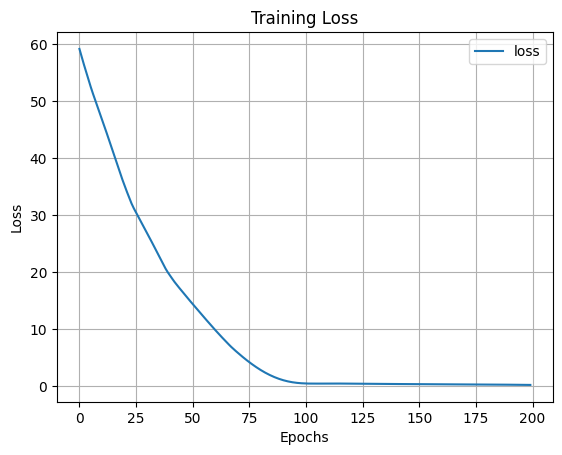

In [4]:
# Paso 5: Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=200)

# Paso 6: Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [5]:
#Paso 7: Evaluación del modelo
Evaluación = model.evaluate(X_test, y_test)
print("Evaluación del modelo:", Evaluación)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 6.0197
Evaluación del modelo: 6.019660472869873


Predicción del modelo X_test:
 [[10 11 12 13]
 [11 12 13 14]]
Etiquetas reales y_test:
 [14 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Predicciones del modelo:
 [[16.265324]
 [17.62824 ]]


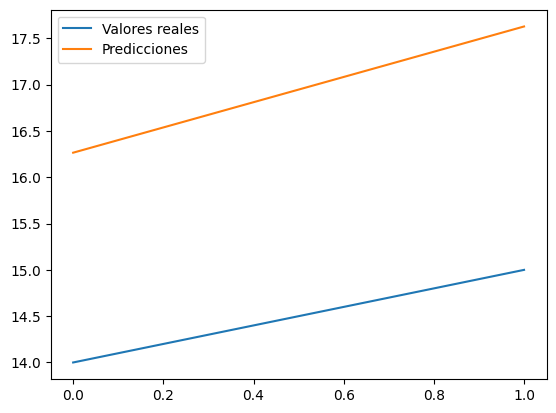

In [6]:
# Paso 8: Predicción
print("Predicción del modelo X_test:\n", X_test)
print("Etiquetas reales y_test:\n", y_test)
y_pred = model.predict(X_test)
print("Predicciones del modelo:\n", y_pred)
plt.plot(y_test, label='Valores reales')
plt.plot(y_pred, label='Predicciones')
plt.legend()
plt.show()

Promedio de las diferencias: -2.446782112121582


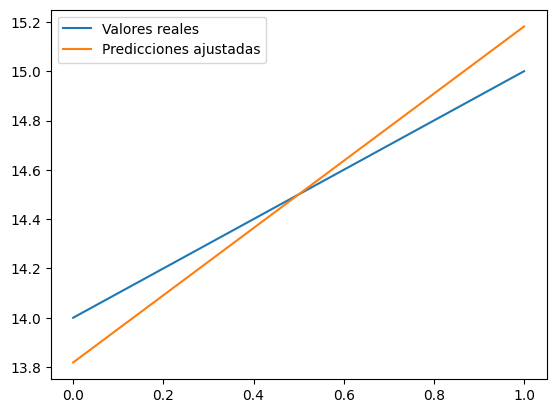

In [7]:
#Ajustando el pronóstico porque se mantiene la tendencia
# Calcular las diferencias entre y_test y y_pred
differences = y_test - y_pred

# Calcular el promedio de las diferencias
mean_difference = differences.mean()
print("Promedio de las diferencias:", mean_difference)

# Restar el promedio de las diferencias a cada valor en y_pred
y_pred_adjusted = y_pred + mean_difference

# Graficar los valores reales y las predicciones ajustadas
plt.plot(y_test, label='Valores reales')
plt.plot(y_pred_adjusted, label='Predicciones ajustadas')
plt.legend()
plt.show()